# Bike Sharing Assignment

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Understanding Data

In [5]:
bikes_data = pd.read_csv(r'E:\AIML Upgrad\Linear Regression\day.csv')
bikes_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Preparation

In [8]:
# removed date records as we already have a year and month column for our analysis
bikes_data = bikes_data.drop('dteday', axis=1)

In [9]:
# since our target variable is 'cnt' only, therefore removing casual and registered columns (cnt = casual + registered)
bikes_data = bikes_data.drop('casual', axis=1)
bikes_data = bikes_data.drop('registered', axis=1)

In [10]:
bikes_data = bikes_data.drop('instant', axis=1)            #also removing instant as this is the serial count no 
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bikes_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [12]:
# we have some data which represent categorical data such as 
# - Season (1-4), - yr (0-2018 / 1-2019), - holiday (0-No / 1-yes), workingday (0-No weekend or holiday / 1-yes)
# - weathersit (1-4)

#### Doing some visualisation analysis

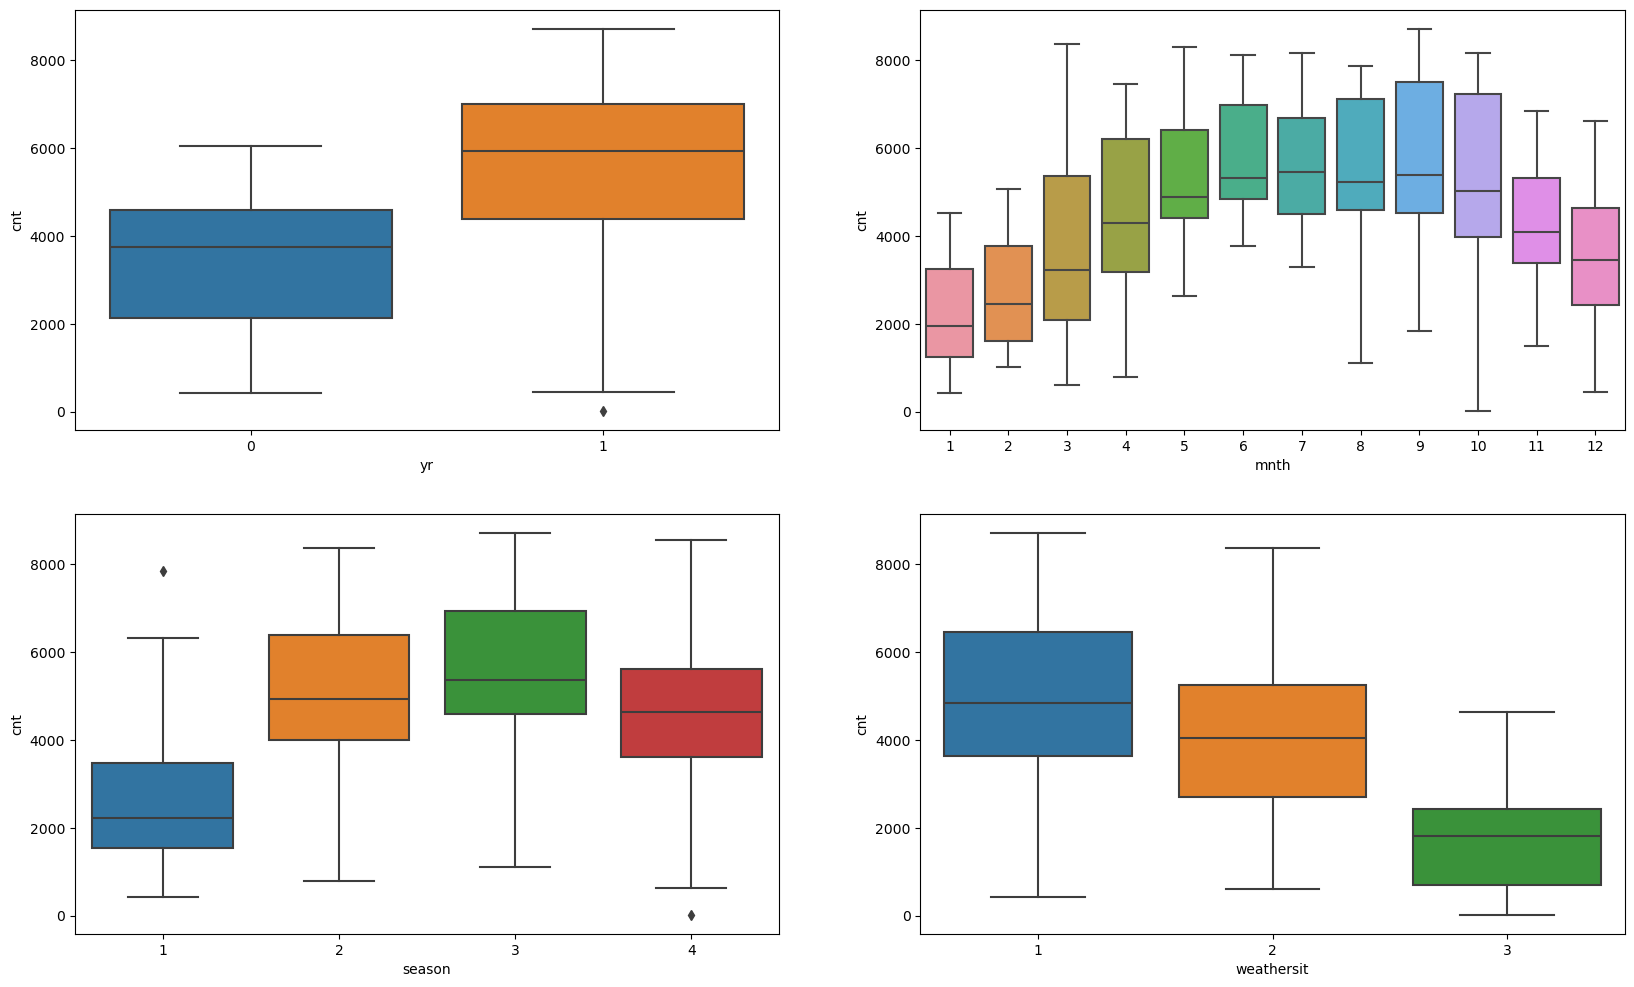

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x='yr', y='cnt', data=bikes_data)
plt.subplot(2,2,2)
sns.boxplot(x='mnth', y='cnt', data=bikes_data)
plt.subplot(2,2,3)
sns.boxplot(x='season', y='cnt', data=bikes_data)
plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y='cnt', data=bikes_data)
plt.show()

#### Creating dummy variables for 'season', 'weathersit', 'mnth' & 'weekdays'

For such variables folllowing the dummy variable rule = n-1 (n -> no of level)

In [17]:
season_d = pd.get_dummies(bikes_data['season'], drop_first=True).astype(int)
season_d

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


- here 000 -> corresponds to spring
- here 100 -> corresponds to summer
- here 010 -> corresponds to fall
- here 001 -> corresponds to winter

In [19]:
season_d.columns

Index([2, 3, 4], dtype='int64')

In [20]:
#changing numbers which represent seasons to their names

In [21]:
season_d = season_d.rename(columns={2: "summer", 3: "fall", 4: "winter"})
season_d.tail(250)

,summer,fall,winter
480,1,0,0
481,1,0,0
482,1,0,0
483,1,0,0
484,1,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [22]:
weathersit_d = pd.get_dummies(bikes_data['weathersit'], drop_first=True).astype(int)
weathersit_d

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


- here 00 correponds to clear_conditions
- here 10 correponds to mist_and_clouds
- here 01 correponds to stormy_condition
- also 1 more thing to be noted is there are 0 records for heavy rain and thunderstorms therefore it is already deduced by python

In [24]:
weathersit_d.columns

Index([2, 3], dtype='int64')

In [25]:
#changing numbers which represent weathers to the names

In [26]:
weathersit_d = weathersit_d.rename(columns = {2:'mist_and_clouds', 3:'stormy_condition'})
weathersit_d

,mist_and_clouds,stormy_condition
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [27]:
months = pd.get_dummies(bikes_data['mnth'], drop_first=True).astype(int)
months

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [28]:
months.columns

Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [29]:
#changing month numbers to month names

In [30]:
months = months.rename(columns = {2:'Febraurary', 3:'March',4:'April' ,5:'May' ,6:'June' ,7:'July' ,8:'August' ,9:'September' ,10:'October' ,11:'November', 12:'December'})
months.tail()

,Febraurary,March,April,May,June,July,August,September,October,November,December
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1
729,0,0,0,0,0,0,0,0,0,0,1


If the row has all 0 represents -> month is January 

In [32]:
weeks = pd.get_dummies(bikes_data['weekday'], drop_first=True).astype(int)
weeks

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [33]:
#changing weekday numbers to weekday names

In [34]:
weeks = weeks.rename(columns = {1:'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday' ,5:'Saturday' ,6:'Sunday'})
weeks.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


A row having all 0 -> represents Monday

In [36]:
# we are supposed to concat these into main table and then remove season, weathersit, mnth, weekday features
bikes_data = pd.concat([bikes_data, season_d], axis=1)
bikes_data = pd.concat([bikes_data, weathersit_d], axis=1)

In [37]:
bikes_data = pd.concat([bikes_data, months], axis=1)
bikes_data = pd.concat([bikes_data, weeks], axis=1)

In [38]:
bikes_data = bikes_data.drop(['season', 'weathersit', 'weekday', 'mnth' ], axis=1) 

In [39]:
bikes_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,September,October,November,December,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


### Creating Train-test sets

In [41]:
import sklearn
from sklearn.model_selection import train_test_split

In [42]:
df_train, df_test = train_test_split(bikes_data, train_size=0.7, random_state=100)

In [43]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the data

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
bikes_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,September,October,November,December,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#creating list of numerical variables
num_vars = ['temp','atemp','hum', 'windspeed','cnt']

In [49]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,September,October,November,December,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


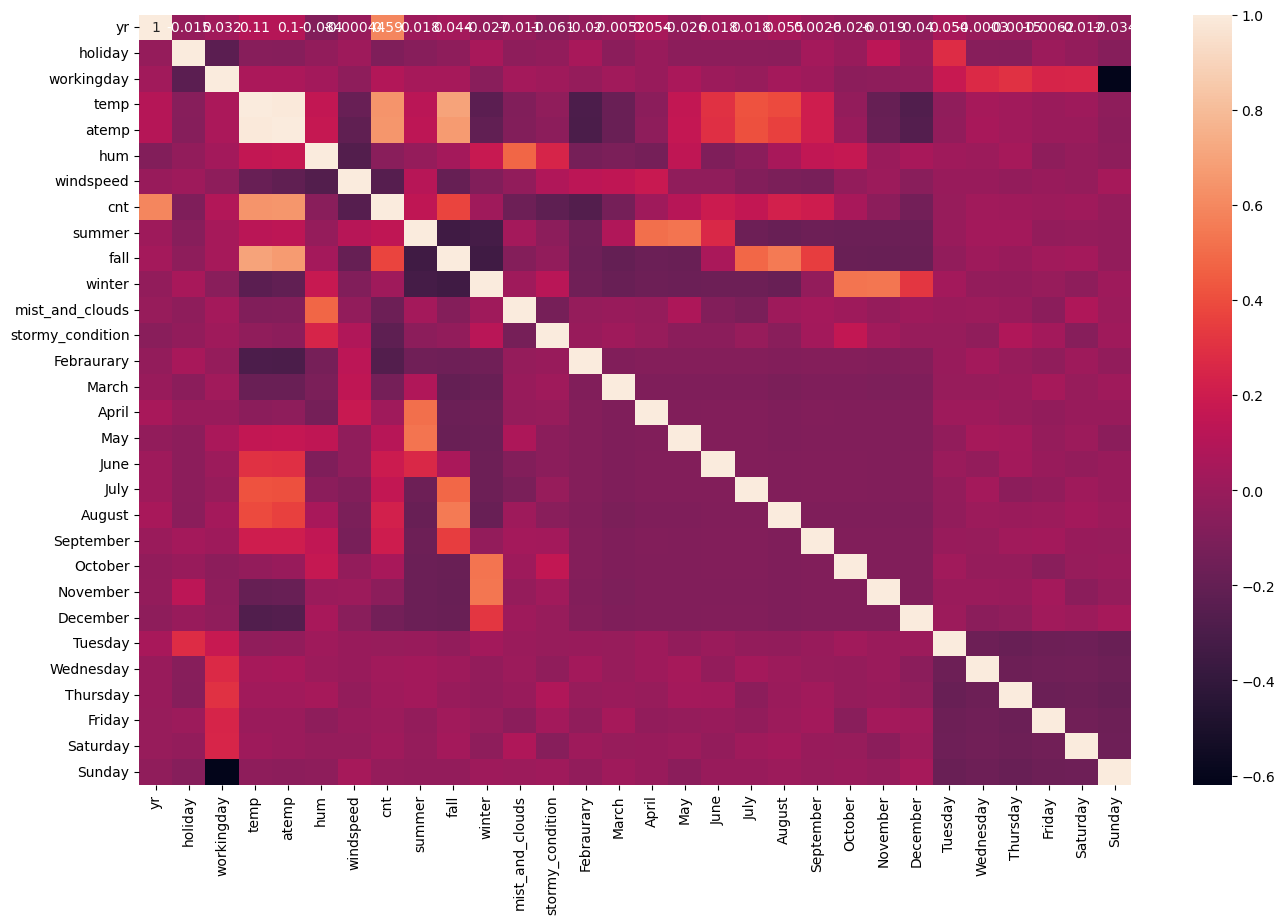

In [52]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [53]:
df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,September,October,November,December,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
yr,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.084061,-0.000439,0.591433,0.018294,0.044102,...,0.002574,-0.025933,-0.018790,-0.040049,0.053634,-0.000296,-0.001452,-0.006153,-0.011876,-0.033817
holiday,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.063798,-0.040017,...,0.043692,-0.004302,0.127543,-0.004302,0.279279,-0.062897,-0.070276,0.009759,-0.024505,-0.069242
workingday,0.031808,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,0.092019,0.046302,0.050976,...,0.019495,-0.046584,-0.041271,-0.031500,0.174565,0.268948,0.300501,0.246594,0.251739,-0.619074
temp,0.108054,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,0.645048,0.126057,0.697012,...,0.207212,-0.018286,-0.194994,-0.273091,-0.032455,0.048662,0.029020,0.002518,0.015642,-0.042608
atemp,0.104971,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,0.647944,0.136550,0.669431,...,0.205900,-0.005162,-0.185918,-0.262072,-0.025473,0.051493,0.027554,0.006022,0.001289,-0.043785
hum,-0.084061,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.058793,-0.014192,0.039925,...,0.152439,0.167153,0.004676,0.057615,0.022296,0.012087,0.046866,-0.038530,-0.016457,-0.040858
windspeed,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,0.110441,-0.195088,...,-0.121930,-0.018546,0.009742,-0.061179,-0.004658,-0.004101,-0.019862,-0.004620,-0.016023,0.049063
cnt,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.140259,0.372210,...,0.201639,0.055558,-0.048002,-0.143546,-0.009333,0.030528,0.025468,0.009928,0.024805,-0.015998
summer,0.018294,-0.063798,0.046302,0.126057,0.136550,-0.014192,0.110441,0.140259,1.000000,-0.341962,...,-0.169366,-0.173818,-0.176016,-0.173818,-0.000299,0.032932,0.037167,-0.024073,-0.014435,-0.019069
fall,0.044102,-0.040017,0.050976,0.697012,0.669431,0.039925,-0.195088,0.372210,-0.341962,1.000000,...,0.347811,-0.181148,-0.183439,-0.181148,-0.027766,0.018412,-0.003441,0.027959,0.039030,-0.021633


### Building the model

In [55]:
#lets setup y_train and X_train
y_train = df_train.pop('cnt')
X_train = df_train

In [56]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,September,October,November,December,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
## using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 4),
 ('winter', True, 1),
 ('mist_and_clouds', True, 1),
 ('stormy_condition', True, 1),
 ('Febraurary', False, 10),
 ('March', False, 5),
 ('April', False, 7),
 ('May', False, 6),
 ('June', False, 8),
 ('July', False, 11),
 ('August', True, 1),
 ('September', True, 1),
 ('October', False, 3),
 ('November', False, 12),
 ('December', False, 13),
 ('Tuesday', False, 14),
 ('Wednesday', False, 15),
 ('Thursday', False, 17),
 ('Friday', False, 18),
 ('Saturday', False, 16),
 ('Sunday', True, 1)]

In [60]:
#taking the supported columns
col = X_train.columns[rfe.support_]

In [61]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'mist_and_clouds', 'stormy_condition', 'August', 'September', 'Sunday'],
      dtype='object')

#### Model 1

In [63]:
import statsmodels.api as sm

In [64]:
X_train_rfe = X_train[col]

In [65]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [66]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [67]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.2
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          4.20e-190
Time:                        00:19:35   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2279      0.027  

p-value of Sunday is high = 0.148 and therefore can be dropped

In [70]:
X_train_new = X_train_rfe.drop(['Sunday'], axis=1)

In [71]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'mist_and_clouds', 'stormy_condition', 'August', 'September'],
      dtype='object')

#### Model 2

- removed 'Sunday'

In [74]:
#rebuilding the model

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          7.50e-191
Time:                        00:19:35   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2322      0.027  

In [75]:
#we see p-value of all features are low therfore we can check if VIF is high for them or not but before that we need to drop const
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,45.17
4,hum,1.86
8,mist_and_clouds,1.55
3,temp,1.54
10,August,1.44
6,summer,1.37
7,winter,1.32
9,stormy_condition,1.23
11,September,1.21
5,windspeed,1.18


In [77]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'mist_and_clouds', 'stormy_condition', 'August', 'September'],
      dtype='object')

In [78]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,hum,14.31
2,temp,9.66
4,windspeed,3.59
7,mist_and_clouds,2.13
0,yr,2.01
5,summer,1.83
6,winter,1.75
9,August,1.59
10,September,1.31
8,stormy_condition,1.16


In [80]:
# VIF of 'hum' is high even tho p-value is low; therefore can be dropped
X_train_new1 = X_train_new.drop(['hum'], axis=1)

In [81]:
X_train_new1.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'mist_and_clouds', 'stormy_condition', 'August', 'September'],
      dtype='object')

#### Model 3

- removed 'hum'

In [84]:
# rebuilding the model

X_train_lm = sm.add_constant(X_train_new1)  #constant added

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.62e-187
Time:                        00:19:35   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1307      0.017  

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.82
8,August,1.58
6,mist_and_clouds,1.49
5,winter,1.48
9,September,1.31
7,stormy_condition,1.08
1,holiday,1.04


In [86]:
X_train_new1.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'mist_and_clouds', 'stormy_condition', 'August', 'September'],
      dtype='object')

In [87]:
# VIF(temp) is close to 5 therefore testing its removal with new variable

In [88]:
X_train_new2 = X_train_new1.drop(['temp'], axis=1)

- removed 'temp'

### Residual Analysis

In [91]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'mist_and_clouds', 'stormy_condition', 'August', 'September'],
      dtype='object')

In [92]:
y_train_pred1 = lm.predict(X_train_lm)

In [93]:
res = y_train - y_train_pred1

Text(0.5, 1.0, 'Distribution of residuals')

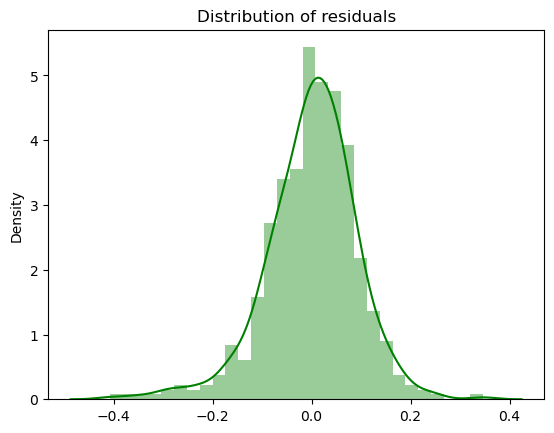

In [94]:
sns.distplot(res, color = 'green')
plt.title('Distribution of residuals')

- The graph is normally distributed and mean is close to 0

### Making Prediction and Evaluating on test cases (Model 3)

In [97]:
#scaling numerical variables in test sets as well
num_vars = ['temp','atemp','hum', 'windspeed','cnt']

In [98]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [99]:
#splitting X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [104]:
#now we need to drop columns as in X_train set 
#creating X_test_new 
X_test_new = X_test[X_train_new1.columns]

In [106]:
#adding constant now to new features
X_test_new = sm.add_constant(X_test_new)

In [108]:
X_test_new.columns   #we are left with the same features we used with train sets

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'mist_and_clouds', 'stormy_condition', 'August', 'September'],
      dtype='object')

In [110]:
y_test_pred = lm.predict(X_test_new)

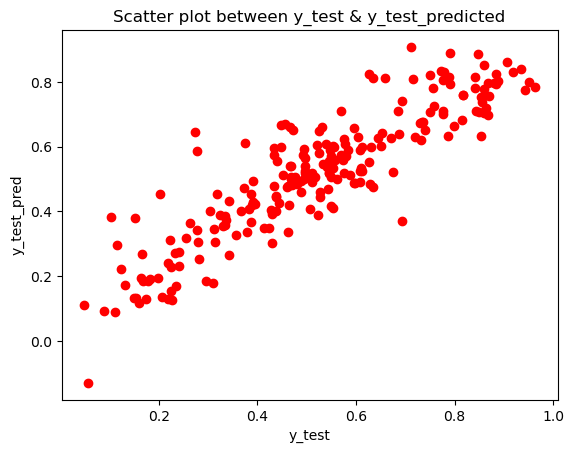

In [112]:
plt.scatter(y_test, y_test_pred, color='red')
plt.title('Scatter plot between y_test & y_test_predicted')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [114]:
from sklearn.metrics import r2_score

In [116]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7935224695104377

#### Conclusion

##### Upon comparison we can see that while our Training model was showing 83.4% variance, our test case shows 79.3%. The difference is relatively small < 5% and can be said that model's performance in test cases is still resonably good. 

##### The small difference says that the model performance in training set is little better from test case and therefore its somewhat overfitting but very small

### Equation of the Best fit Line

cnt = 0.13 + 0.23 x yr - 0.09 x holiday + 0.51 x temp - 0.14 x windspeed + 0.10 x summer + 0.13 x winter - 0.08 x mist_and_clouds - 0.28 x stormy_condition + 0.05 x August + 0.11 x September